<a href="https://colab.research.google.com/github/sunnys-lab/GC_2019_Track3_Voice/blob/master/voice_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Mounting Google Drive

In [62]:
from google.colab import drive
drive.mount('/content/drive/')
!ls '/content/drive/My Drive'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'Block chain Study'   GC_2019_Track3_Voice  'Go Backup'


## 2. Import libraries

In [122]:
# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display
import wave
import pylab
from scipy.io import wavfile

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

## 3. Visualization
There are two theories of a human hearing - place ( https://en.wikipedia.org/wiki/Place_theory_(hearing) (frequency-based) and temporal (https://en.wikipedia.org/wiki/Temporal_theory_(hearing) ) In speech recognition, I see two main tendencies - to input spectrogram (frequencies), and more sophisticated features MFCC - Mel-Frequency Cepstral Coefficients, PLP. You rarely work with raw, temporal data.

Let's visualize some recordings!

### 3.1. Wave and spectrogram:

Choose and read some file:

In [168]:
# 음성파일 경로 지정
data_dir = '/content/drive/My Drive/GC_2019_Track3_Voice'
train_audio_path = data_dir + '/train/'
filename = train_audio_path + 't3_audio_0001.wav'

waveFile = wave.open(filename, 'r')

frameRate = waveFile.getframerate()
nChannels = waveFile.getnchannels()
sampWidth = waveFile.getsampwidth()
num_frame = waveFile.getnframes()

print ('Num of Channel=' + str(nChannel))

sample_rate, data = wavfile.read(filename)

left = data[:, 0]
right = data[:, 1]

print (frameRate)
print (data)
print (left)
print (right)

# Player 실행
ipd.Audio(filename)

Num of Channel=2
44100
[[-8236  6689]
 [-7739  7118]
 [-7545  6894]
 ...
 [ -163  2674]
 [  -24  2796]
 [  -30  2654]]
[-8236 -7739 -7545 ...  -163   -24   -30]
[6689 7118 6894 ... 2674 2796 2654]


Define a function that calculates spectrogram.

Note, that we are taking logarithm of spectrogram values. It will make our plot much more clear, moreover, it is strictly connected to the way people hear. We need to assure that there are no 0 values as input to logarithm.

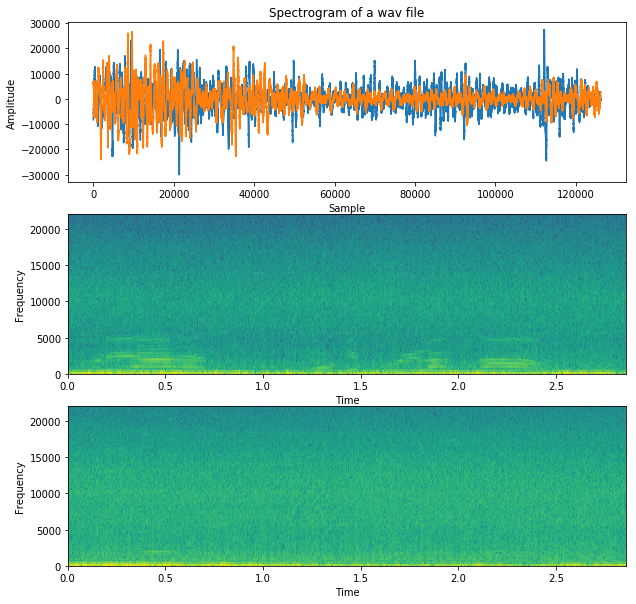

In [181]:
#import the pyplot and wavfile modules 
import matplotlib.pyplot as plot
from scipy.io import wavfile

# Read the wav file (mono)
samplingFrequency, signalData = wavfile.read(filename)

left = signalData[:, 0]
right = signalData[:, 1]
 

# Plot the signal read from wav file
plot.figure(figsize=(10, 10))
plot.subplot(311)
plot.title('Spectrogram of a wav file')
plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')

plot.subplot(312)
plot.specgram(left,Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')

plot.subplot(313)
plot.specgram(right,Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')

plot.show()

Frequencies are in range (0, 8000) according to Nyquist theorem.
Let's plot it:

In [187]:
x, sr = librosa.load(filename)
ipd.Audio(x, rate=sr)

## Spectrogram Visualization: Linear Amplitude
Let's plot a magnitude spectrogram where the colorbar is a linear function of the spectrogram values, i.e. just plot the raw values.

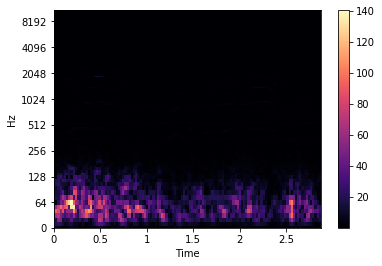

In [192]:
X = librosa.stft(x)
X.shape

Xmag = abs(X)
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Spectrogram Visualization: Log Amplitude
Now let's plot a magnitude spectrogram where the colorbar is a logarithmic function of the spectrogram values.

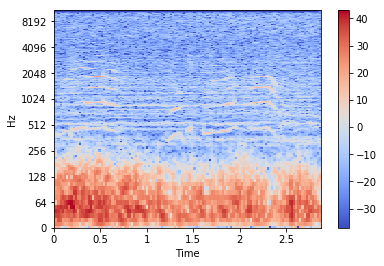

In [194]:
Xdb = librosa.amplitude_to_db(Xmag)
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

One common variant is the  log(1+λx)  function, sometimes known as logarithmic compression (FMP, p. 125). This function operates like  y=λx  when  λx  is small, but it operates like  y=logλx  when  λx  is large.

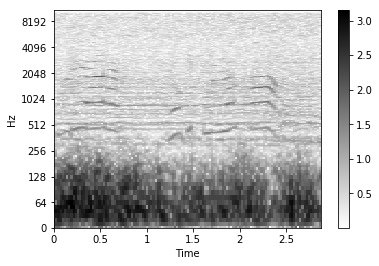

In [195]:
Xmag = np.log10(1+10*abs(X))
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log', cmap="gray_r")
plt.colorbar()

## Spectrogram Visualization: Perceptual Weighting

/usr/local/lib/python3.6/dist-packages/librosa/core/time_frequency.py:1006: RuntimeWarning:

divide by zero encountered in log10



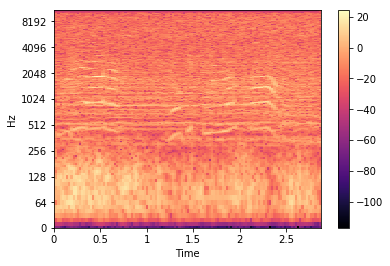

In [196]:
freqs = librosa.core.fft_frequencies(sr=sr)
Xmag = librosa.perceptual_weighting(abs(X)**2, freqs)
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()